# CNNbasic Assignment#2

# AlexNet 구현

모델 구현 후 summary로 전체 모델 구조 출력과 주석으로 간단한 설명을 달아주시면 됩니다.

프레임워크는 자유이고, 기본 tensforflow와 pytorch tutorial 사이트를 아래에 첨부해 드립니다.

이 외 각 프레임워크 별 summary 등 추가적인 사용 방법은 구글링으로 찾아주세요!-!

- Tensorflow Tutorial: https://www.tensorflow.org/tutorials?hl=ko

- Pytorch Tutorial: https://tutorials.pytorch.kr/

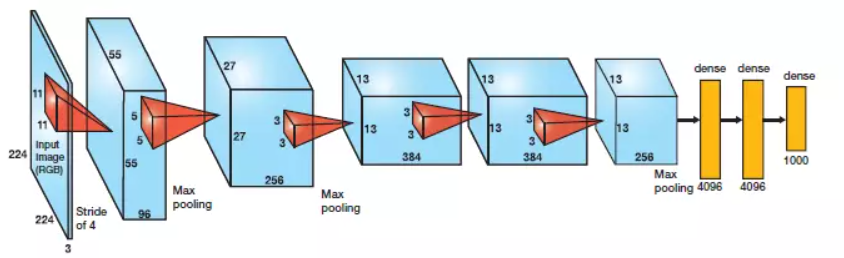

## Tensorflow(keras)

✅ Conv2D(filters, kernel_size, strides=(1,1), padding='valid', activation=None)  
✅ MaxPooling2D(pool_size=(2, 2), strides=None)

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,BatchNormalization
from tensorflow.keras.models import Sequential


n_classes = 1000 # class 개수

model=Sequential()

############## Add Layer ##############

# 1st Convolution Layer                                                              # ↱첫 번째 Conv2D는 input_shape 입력해야 함
model.add(Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)))
# 1st Maxpooling 
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# 2nd Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu')) 
# 2nd Maxpooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(BatchNormalization())

# 3rd Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) 

# 4th Convolution Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) 

# 5th Convolution Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')) 
# 3rd Maxpooling
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2)))
model.add(Flatten())


# 1nd FC Layer
model.add(Dense(4096, activation='relu'))
# 2nd FC Layer
model.add(Dense(4096, activation='relu'))
# 3rd FC Layer
model.add(Dense(n_classes, activation='softmax'))

#######################################


# keras summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 55, 55, 96)        34944     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 27, 27, 96)        0         
 g2D)                                                            
                                                                 
 batch_normalization (Batch  (None, 27, 27, 96)        384       
 Normalization)                                                  
                                                                 
 conv2d_3 (Conv2D)           (None, 27, 27, 256)       614656    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 256)       0         
 g2D)                                                            
                                                      

## Pytorch

In [21]:
import torch
# import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary


class AlexNet(nn.Module):

    def __init__(self, n_classes):
        super(AlexNet, self).__init__()
        
        ############## Add Layer ##############
        
        self.layers = nn.Sequential(
            # 1st Convolution Layer
            nn.Conv2d(in_channels=3, out_channels=96, kernel_size=11, stride=4, padding=0),
            nn.BatchNorm2d(96),
            nn.ReLU(),
            # 1st Maxpooling
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 2nd Convolution Layer
            nn.Conv2d(in_channels=96, out_channels=256, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            # 2nd Maxpooling
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 3rd Convolution Layer
            nn.Conv2d(in_channels=256, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # 4th Convolution Layer
            nn.Conv2d(in_channels=384, out_channels=384, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),

            # 5th Convolution Layer
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            # 3rd Maxpooling
            nn.MaxPool2d(kernel_size=3, stride=2),
    
        )
        
        
        self.flatten = nn.Flatten()

        self.classifier = nn.Sequential(
            # 1nd FC Layer
            nn.Dropout(p=0.5),
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(),

            # 2nd FC Layer
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),

            # 3rd FC Layer
            nn.Linear(in_features=4096, out_features=n_classes)
        )
        
        #######################################
  
        
        
    def forward(self, x):
        
        ############## Add Layer ##############
        x = self.layers(x)
        x = self.flatten(x)
        x = self.classifier(x)
        #######################################
        
        return x


# pytorch summary
AlexModel = AlexNet(n_classes = 1000)
summary(AlexModel, input_size=(3, 227, 227)) # summary code 추가

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 96, 55, 55]          34,944
       BatchNorm2d-2           [-1, 96, 55, 55]             192
              ReLU-3           [-1, 96, 55, 55]               0
         MaxPool2d-4           [-1, 96, 27, 27]               0
            Conv2d-5          [-1, 256, 27, 27]         614,656
       BatchNorm2d-6          [-1, 256, 27, 27]             512
              ReLU-7          [-1, 256, 27, 27]               0
         MaxPool2d-8          [-1, 256, 13, 13]               0
            Conv2d-9          [-1, 384, 13, 13]         885,120
             ReLU-10          [-1, 384, 13, 13]               0
           Conv2d-11          [-1, 384, 13, 13]       1,327,488
             ReLU-12          [-1, 384, 13, 13]               0
           Conv2d-13          [-1, 256, 13, 13]         884,992
             ReLU-14          [-1, 256,